# 6.1 Sourcing Open Data

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Data Exploration

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('/Users/selcenayranci/Desktop/NYC-Airbnb-2023.csv')

In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [15]:
df.shape

(42931, 18)

### 2. Data Cleaning

In [16]:
# Checking the data types

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [17]:
# Descriptive Analysis

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,32627.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,1.168988,24.054809,140.262211,7.736507
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,1.789675,80.867958,142.001486,18.290256
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,0.520000,1.000000,89.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,1.670000,4.000000,289.000000,7.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000,1093.000000


##### There are some suspicious values we can detect here:

##### For example 'price' column has min 0 which is impossible. The max value is also seems very high based on the 75% of the values are less than 200$. There are possibly outliers.

##### Another column that needs attention is the 'minimum_nights' column. 75% of the values are less than 30 days but the max value is 1250 days which indicates some outliers.  

##### These columns will be analyzed in detail later in Data Exploration section. 

In [18]:
# Checking for missing values

df.isna().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64

In [95]:
# "last_review" and "reviews_per_month" have missing values that are more than 5%.
# I am not removing them but filling them with 0

df['last_review'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [96]:
df.isna().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64

In [97]:
# Dropping column "host_name" and "host_id" due to PII reasons

df.drop('host_name', axis=1, inplace=True)
df.drop('host_id', axis=1, inplace=True)

In [98]:
# Dropping column "license" as the whole column is missing values

df.drop('license', axis=1, inplace=True)

In [99]:
df.shape

(42931, 15)

In [100]:
# Checking for duplicates

df.duplicated().sum()

0

##### No duplicates found!

In [101]:
# Checking for mixed data types

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

name
last_review


In [107]:
# Changing data types of name and last_review columns

df['name'] = df['name'].astype(str)
df['last_review'] = df['last_review'].astype(str)

In [103]:
# Checking for mixed data types

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

In [104]:
df.columns

Index(['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [105]:
# Renaming columns

df_1 = df.rename(columns={'id':'ID',
                          'name':'Name',
                          'neighbourhood_group':'Neighbourhood Group',
                          'neighbourhood':'Neighbourhood',
                          'latitude':'Latitude',
                          'longitude':'Longitude',
                          'room_type':'Room Type',
                          'price':'Price', 
                          'minimum_nights':'Min Nights',
                          'number_of_reviews':'No of Reviews',
                          'last_review':'Last Review',
                          'reviews_per_month':'Reviews Per Month',
                          'calculated_host_listings_count':'Calculated Host Listings', 
                          'availability_365':'Availability',
                          'number_of_reviews_ltm':'No of Reviews LTM'})

### 3. Data Exploration

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Min Nights'}>,
        <Axes: title={'center': 'No of Reviews'}>],
       [<Axes: title={'center': 'Reviews Per Month'}>,
        <Axes: title={'center': 'Calculated Host Listings'}>,
        <Axes: title={'center': 'Availability'}>],
       [<Axes: title={'center': 'No of Reviews LTM'}>, <Axes: >,
        <Axes: >]], dtype=object)

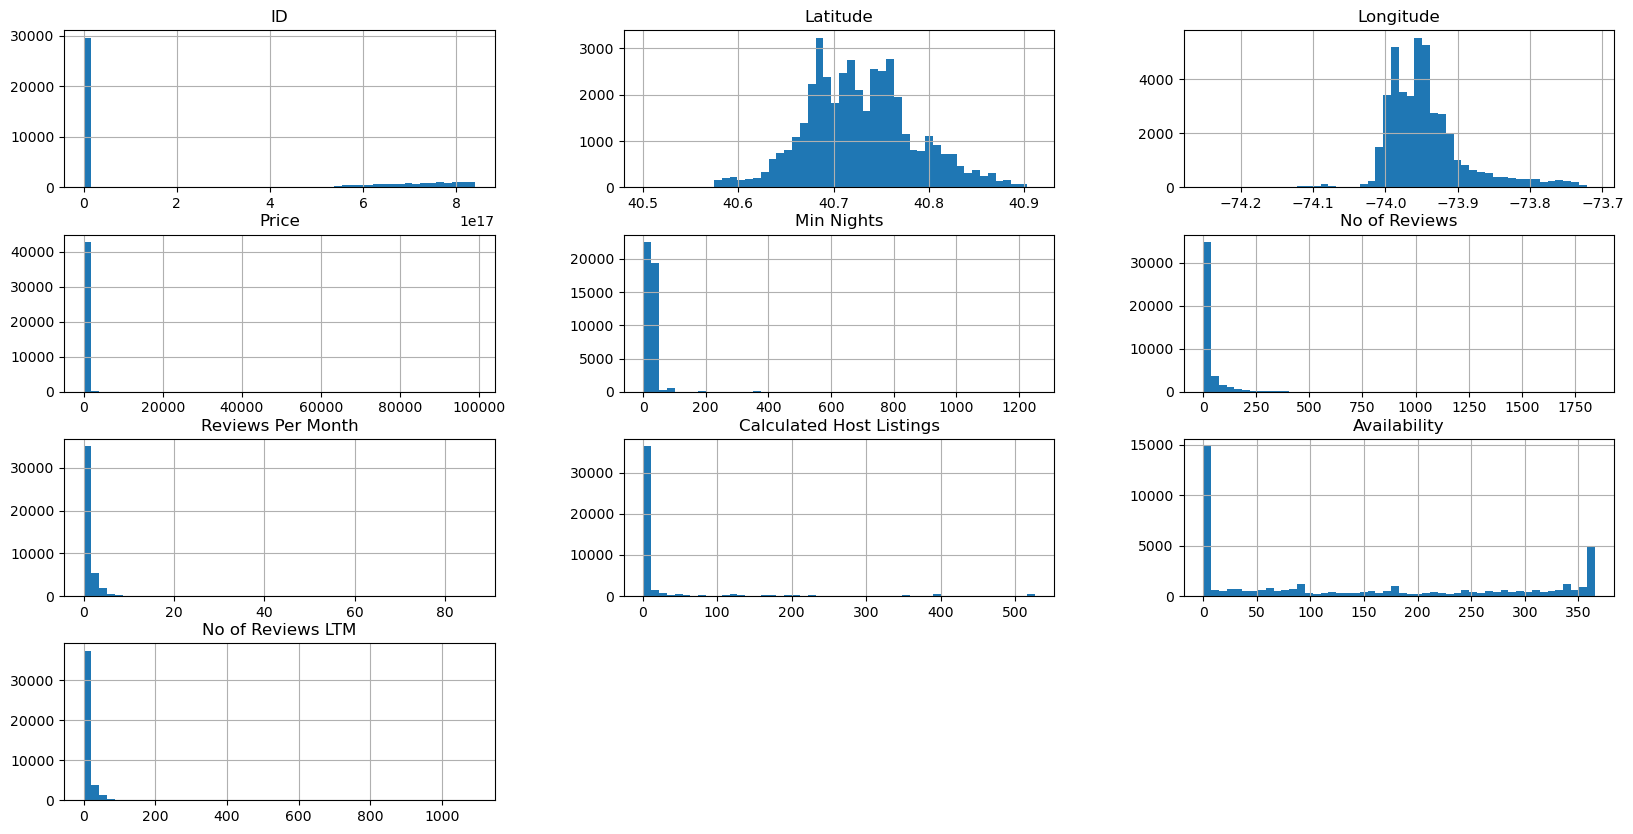

In [108]:
# Checking for outliers

df_1.hist(figsize=(20,10), bins=50)

#### Exploring the Price column

<Axes: >

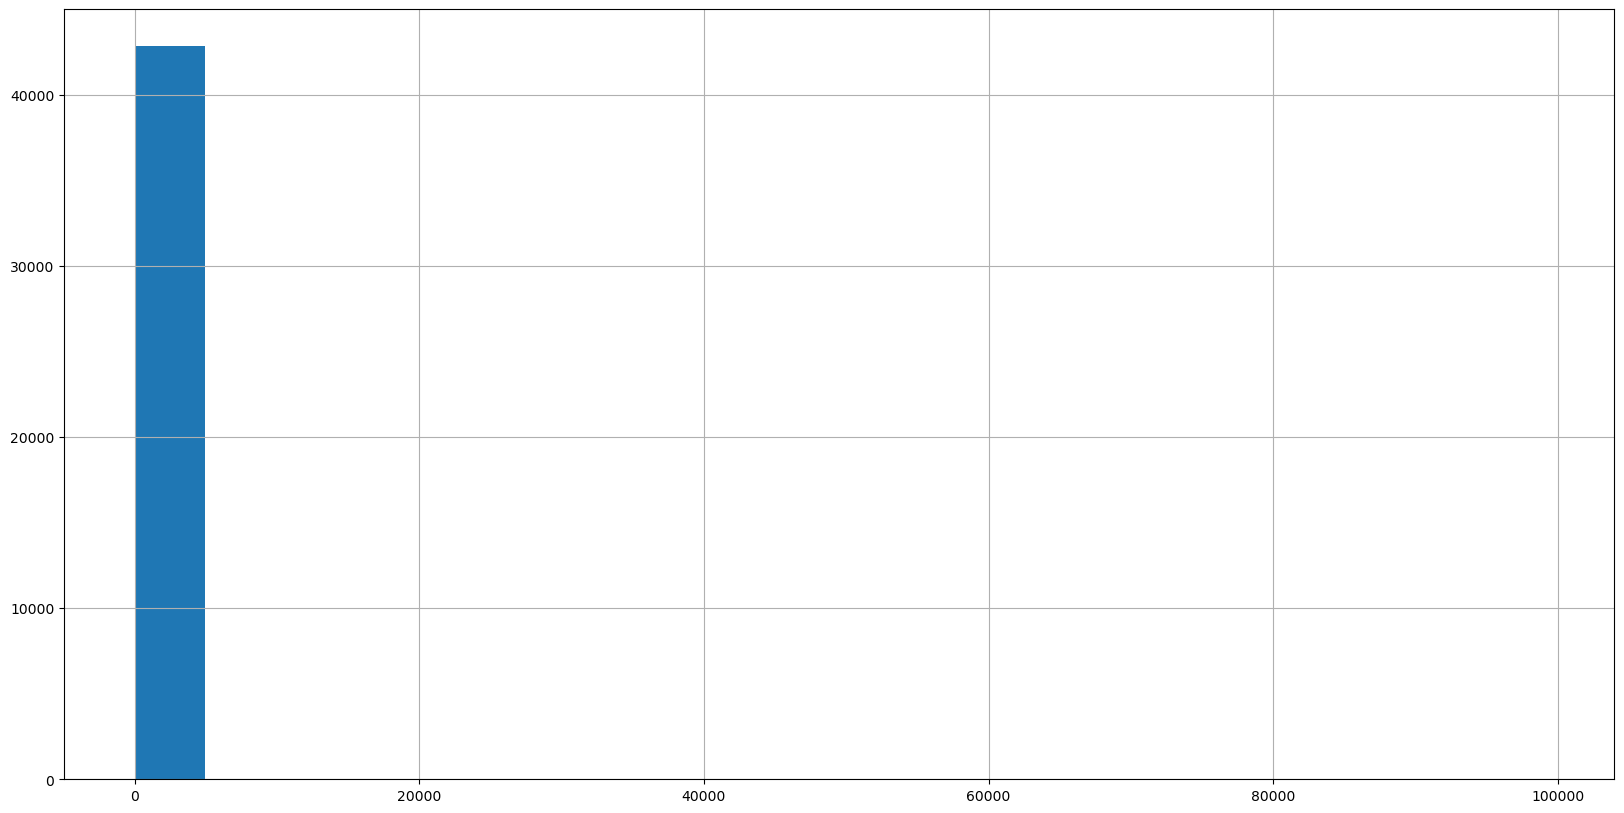

In [132]:
df_1['Price'].hist(figsize=(20,10), bins=20)

In [140]:
# Checking the 0 values

df_1[df_1['Price'] == 0]

,ID,Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,No of Reviews,Last Review,Reviews Per Month,Calculated Host Listings,Availability,No of Reviews LTM
19977,40560656,"The Hoxton, Williamsburg - Cosy Room",Brooklyn,Williamsburg,40.720960,-73.958600,Hotel room,0,1,83,2023-02-17,1.98,1,0,20
20459,41740615,The James New York - NoMad,Manhattan,Midtown,40.744590,-73.985740,Hotel room,0,1,48,2022-10-10,1.18,1,0,11
20460,41740622,Gardens Suites Hotel by Affinia,Manhattan,Upper East Side,40.764420,-73.963030,Hotel room,0,1,5,2022-10-01,0.15,1,0,2
20542,41792753,Mint House At 70 Pine,Manhattan,Financial District,40.706510,-74.007770,Hotel room,0,1,619,2023-01-02,10.81,1,0,57
20718,42279171,Leon Hotel LES,Manhattan,Chinatown,40.716100,-73.995180,Hotel room,0,1,348,2023-02-13,8.05,1,0,64
20790,42065545,Carvi Hotel NYC,Manhattan,Midtown,40.759170,-73.969260,Hotel room,0,30,0,0,0.00,1,0,0
20791,42065547,Hotel Five44,Manhattan,Hell's Kitchen,40.764040,-73.994780,Hotel room,0,30,43,2023-02-05,1.44,1,0,16
20797,42065563,Opera House Hotel,Bronx,Mott Haven,40.815130,-73.916020,Hotel room,0,30,0,0,0.00,1,0,0
20798,42065564,The Wall Street Inn,Manhattan,Financial District,40.704620,-74.010270,Hotel room,0,1,51,2023-02-19,1.59,9,0,21
20823,42228997,Sister City New York,Manhattan,Lower East Side,40.721860,-73.992780,Hotel room,0,30,0,0,0.00,1,0,0


##### There must have been some error for these 0 price values and most of them has a lot of values. Therefore I will impute them with the average price

In [141]:
# Imputing 0 values with average

df_1.loc[df_1['Price'] == 0, 'Price'] = 200

In [142]:
# Checking if the imputing was succesfull

df_1[df_1['Price'] == 0]

,ID,Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Min Nights,No of Reviews,Last Review,Reviews Per Month,Calculated Host Listings,Availability,No of Reviews LTM


In [147]:
df_1['Price'].min()

10

Text(0.5, 1.0, 'Scatterplot of Prices Below 20000')

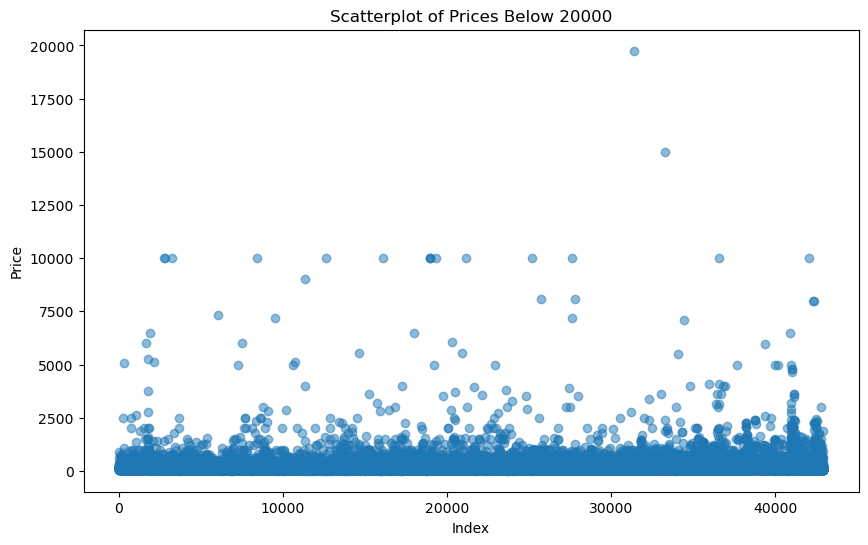

In [148]:
# Creating a scatterplot to check the outliers

filtered_df = df_1[df_1['Price'] < 20000]

# Plot the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df.index, filtered_df['Price'], alpha=0.5)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Scatterplot of Prices Below 20000')

##### As we can see in the scatterplot, most of the values are concenterated around 1000 and go up until 10000 and the dots above are outliers. Meaning that we need to remove the values above 10000.

In [149]:
outlier_counts = df_1[df_1['Price'] > 10000]['Price'].value_counts()
outlier_counts

Price
65115    1
20500    1
19750    1
85170    1
15000    1
99000    1
85100    1
Name: count, dtype: int64

In [150]:
# Removing the outliers in the 'Price'column

df_2 = df_1[df_1['Price'] <= 10000]

In [151]:
# Checking if the removal was successfull

df_2['Price'].max()

10000

In [152]:
df_2.shape

(42924, 15)

##### Removal was successful because we removed 7 outliers and the original dataset had 42931 (42931-7=42924)

#### Exploring the Min Nights column 

<Axes: >

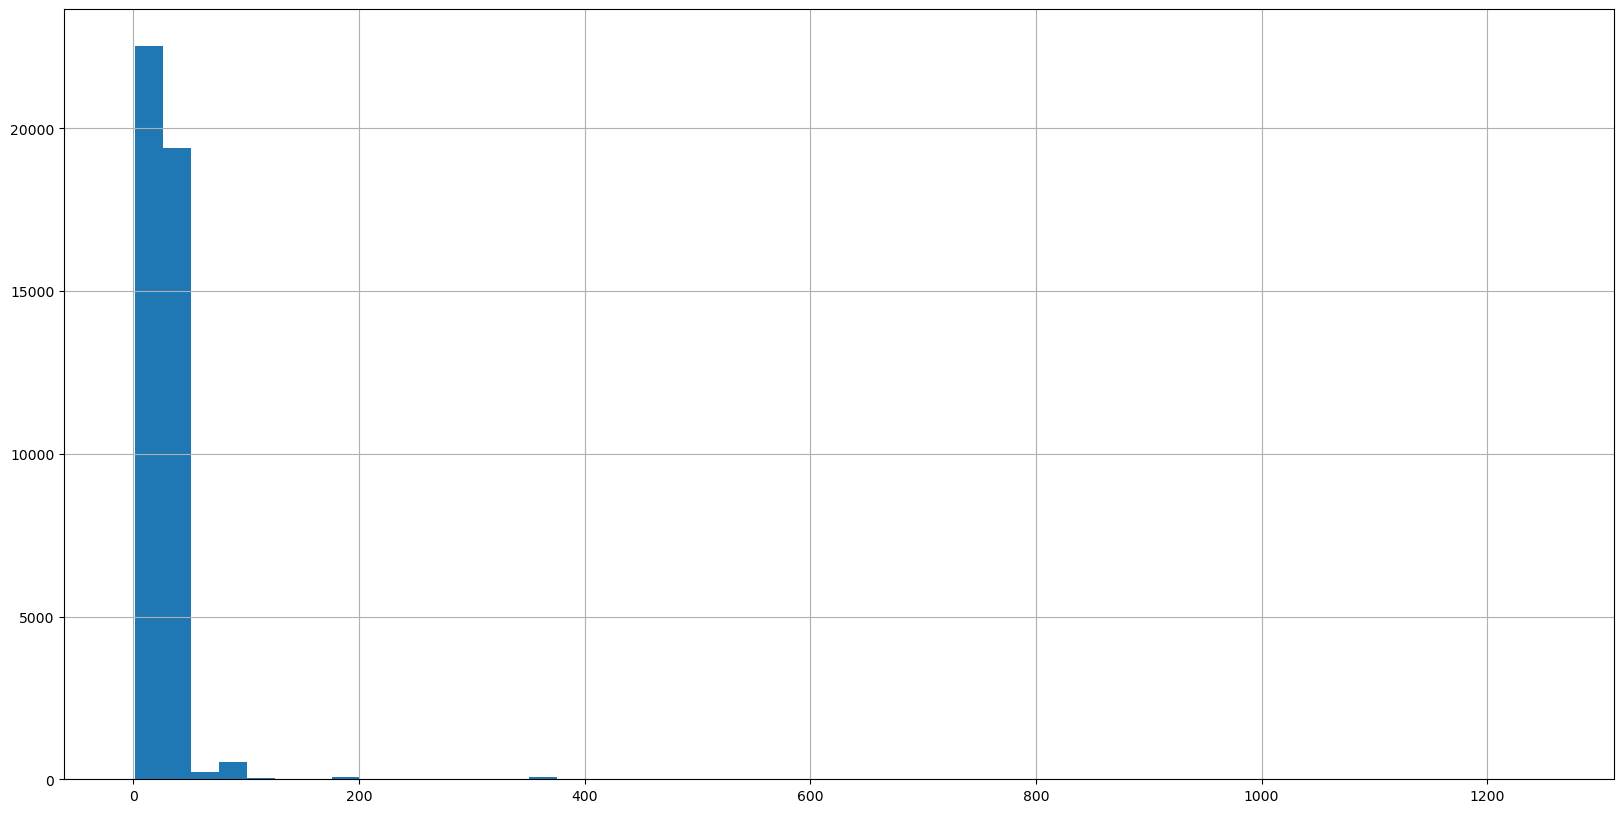

In [153]:
df_2['Min Nights'].hist(figsize=(20,10), bins=50)

<Axes: ylabel='Min Nights'>

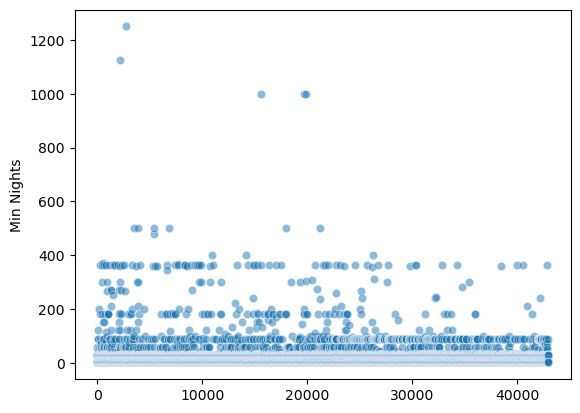

In [160]:
# Creating a scatterplot to check the outliers

sns.scatterplot(data=df_2, x=df_2.index, y='Min Nights', alpha=0.5)

##### As we can see in the scatterplot, most of the values are concenterated around less than 200 days and go up until 400 with few that are slighty above that. The dots above that are outliers. Meaning that we need to remove the values above 600.

In [161]:
outlier_counts = df_2[df_2['Min Nights'] > 600]['Min Nights'].value_counts()
outlier_counts

Min Nights
1000    2
1124    1
1250    1
999     1
Name: count, dtype: int64

In [163]:
# Removing the outliers in the 'Min Nights' column

df_3 = df_2[df_2['Min Nights'] <= 600]

In [164]:
# Checking if the removal was successfull

df_3['Min Nights'].max()

500

In [165]:
df_3.shape

(42919, 15)

##### Removal was successful because we removed 5 outliers and the dataset had 42924 rows (42924-5=42919)

In [166]:
# Exporting the dataframe

df_3.to_csv('/Users/selcenayranci/Desktop/airbnb_2023_v1.csv', index=False)